# Communicating Data Findings - Marketing Analytics Explanatory
## by Amani Ezzat

## Investigation Overview

#### My investigation will cover the following but not limited to:

> - Which marital status has the most frequency?

> - Did the last campaign the store launched succeed?

> - Is there a relationship between `recency` and the `response` of the last campaign the store launched?

## Dataset Overview

> The primary data set was provided to students for their final project as part of a MSc in Business Analytics.
> The dataset marketing_data.csv consists of 2,240 customers of XYZ company. Please be informed that the columns meanings will be attached for your consideration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go

#set a grey background
sns.set_style('darkgrid')

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('marketing_data_cleaned.csv')
df.head()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,...,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,response,complain,country
0,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189,104,...,189,218,1,4,4,6,1,1,0,SP
1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464,5,...,0,37,1,7,3,7,5,1,0,CA
2,1958,Graduation,Married,67267,0,1,2014-05-13,0,134,11,...,2,30,1,3,2,5,2,0,0,US
3,1967,Graduation,Together,32474,1,1,2014-05-11,0,10,0,...,0,0,1,1,0,2,7,0,0,AUS
4,1989,Graduation,Single,21474,1,0,2014-04-08,0,6,16,...,0,34,2,3,1,2,7,1,0,SP


## (1) Marital Status Distribution Frequency  (absolute)

> As the visualization shows, we can say that "Married" people are the most frequent ones to the store in terms of absolute frequency.

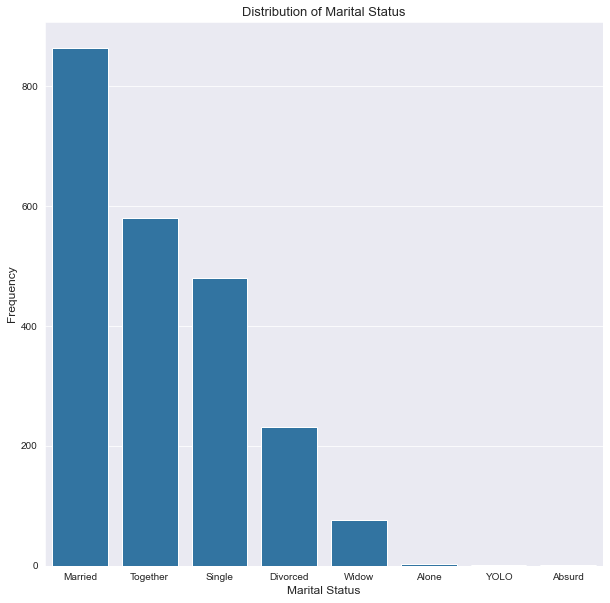

In [3]:
#distribute the frequency of marital_status

plt.figure(figsize=[10,10])


#count the frequency of each unique value in the 'marital_status' column
freq = df['marital_status'].value_counts()

#get the indexes of the series for orders
gen_order = freq.index

base_color = sns.color_palette()[0]
sns.countplot(data=df, x='marital_status', color=base_color, order=gen_order)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Marital Status', fontsize=13);

## (2) Marital Status Distribution Frequency  (relative)

> The previous visualization doesn't help a lot as it represents the frequency as absolute and this doesn't reflect such an indicator since I don't know what percentage of that out of the whole. So, let's calculate the relative percentages for each unique value of the variable 'marital_status'.

> Now we can say that almost 40% out of the customers are married and almost 21% are single.


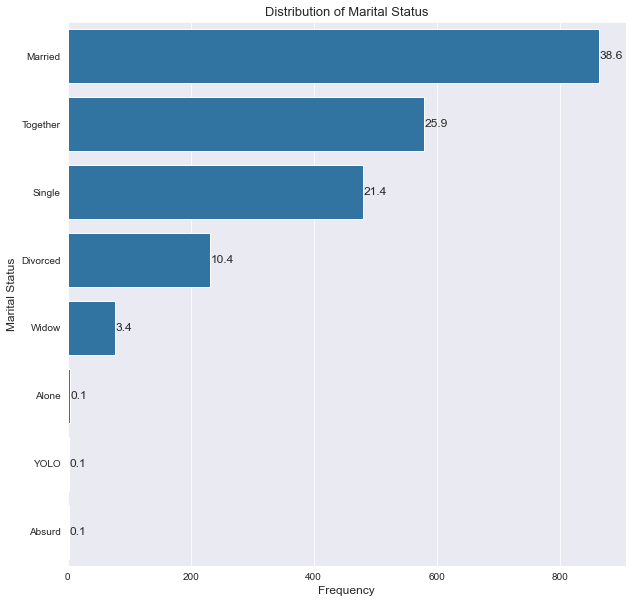

In [4]:
plt.figure(figsize=[10,10])

#count the frequency of unique values in the `marital_status` column
marital_status_counts = df['marital_status'].value_counts()
marital_status_counts

#get the frequency of the unique values of the `marital_status` column in the decreasing order
marital_status = marital_status_counts.index
marital_status

#plot `marital_status` variable 
base_color = sns.color_palette()[0]
sns.countplot(data=df, y='marital_status', color=base_color, order=marital_status)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Marital Status', fontsize=12)
plt.title('Distribution of Marital Status', fontsize=13);

#now let's calculate the relative frequency
#sum of all values in `marital_status` column
n_marital_status = df['marital_status'].value_counts().sum()

# Logic to print the proportion text on the bars
for i in range (marital_status_counts.shape[0]):
    count = marital_status_counts[i]
    #convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_marital_status)
    #show the string value on the bar. 
    plt.text(count+1, i, pct_string, va='center', fontsize=12)

## (3) Response Distribution of last campaign the store launched

> Let's see another visualization based on the `response` variable in the last campaign the store launched.

> As the below chart can tell, the not accepted offers were away more than the accepted ones that means the campaign was not successful. So, I recommend the store to optimize the offers or make more marketing for the store. 

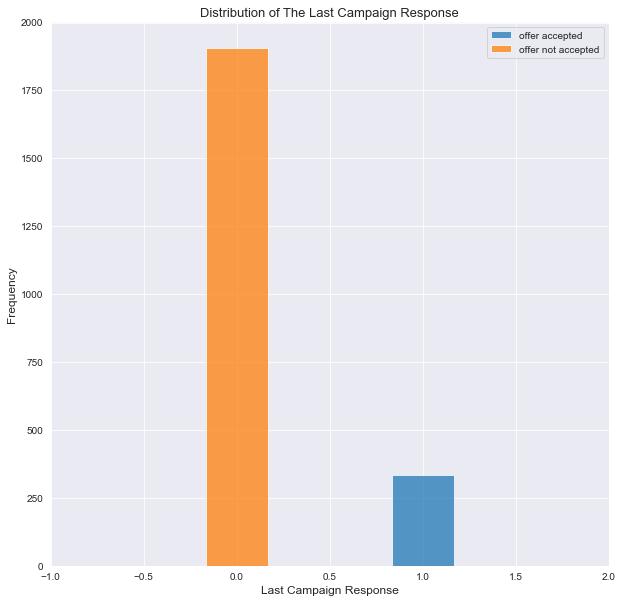

In [5]:
plt.figure(figsize=[10,10])

#create filters of accept_offer and not_accept_offer for the last campaign:
accept_offer = df['response'] == 1
not_accept_offer = df['response'] == 0

# plot response distribution
df.response[accept_offer].hist(alpha=0.75, label='offer accepted', bins=3)
df.response[not_accept_offer].hist(alpha=0.75, label='offer not accepted', bins=3)
plt.xlabel('Last Campaign Response', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of The Last Campaign Response', fontsize=13)
plt.xlim((-1,2))
plt.legend();

## (4) `kidhome` Distribution

> As shown we can say that the most frequent customers are the ones who have no kids in the home and the less frequent ones are those who have 2 kids which most probably they order what they need using another channel.

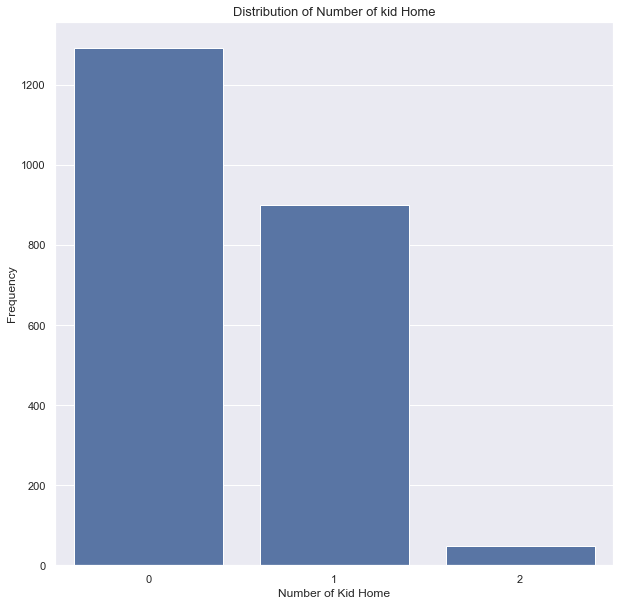

In [6]:
sns.set(rc={'figure.figsize':(10,10)})

#plot the frequency of the customer based of `kidhome` variable
fig = plt.figure();
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'kidhome', color = base_color);
plt.xlabel('Number of Kid Home', fontsize=12);
plt.ylabel('Frequency', fontsize=12);
plt.title('Distribution of Number of kid Home', fontsize=13);

## (5) `recency` Distribution

> That makes sense. The average number of days since the last purchase a customer makes is 50 days which is a huge number, a long time. This can be a start to analyze the reason and make better offers and discounts.

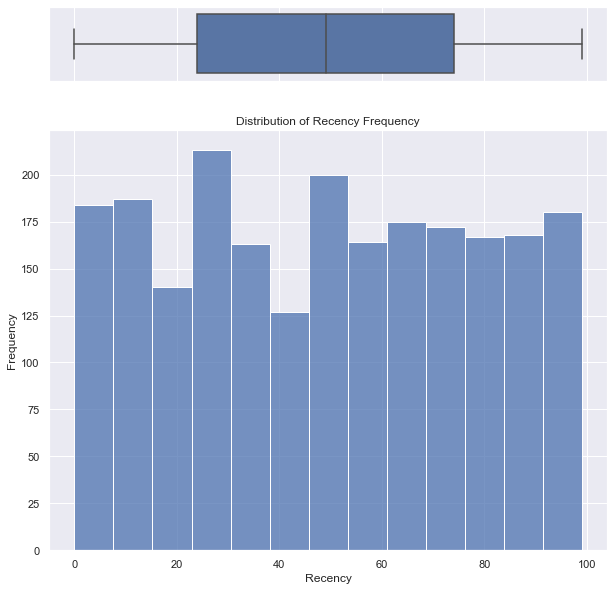

In [7]:
#creating a figure composed of box plot and hist plot
f, (box, hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})
 
#assigning a graph to each ax
sns.boxplot(df['recency'], ax=box)
sns.histplot(data=df, x='recency', ax=hist)

 
#remove x axis name for the box plot
box.set(xlabel='')

plt.xlabel('Recency', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Recency Frequency')
plt.show();

## (6) Plot `numstorepurchases` and `mntfruits` Relationship

> Plot the relationship between the number of purchases from the store and the amount spent on fruits last 2 years. and it has been found out that there is a positive medium relationship between the amount spent on fruits if they are bought from the store.


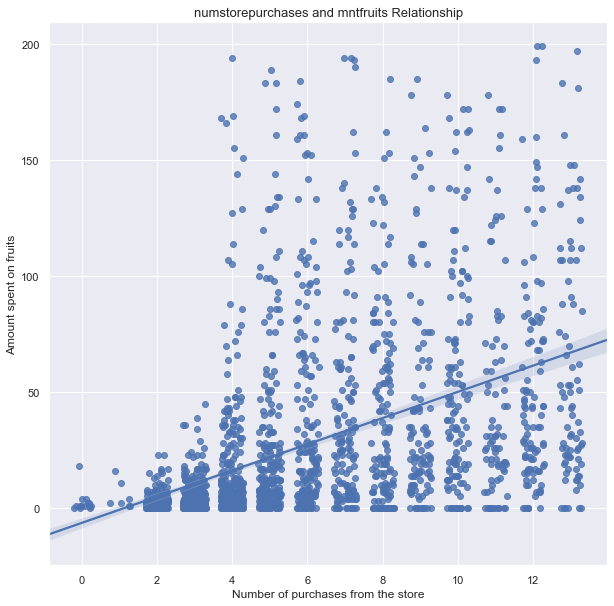

In [8]:
plt.figure(figsize=[10,10])


sns.regplot(data = df, x = 'numstorepurchases', y = 'mntfruits', fit_reg=True, truncate=False, x_jitter=0.3)
plt.xlabel('Number of purchases from the store', fontsize=12)
plt.ylabel('Amount spent on fruits', fontsize=12)
plt.title('numstorepurchases and mntfruits Relationship', fontsize=13);

## (7) Plot `response` and `kidhome` Relationship

> There is a negative relationship between those two variables, maybe the campaign was just in the store and was not available for the other channels so the house that has kids had no chance to go to the store, or maybe there was not good advertising for it.

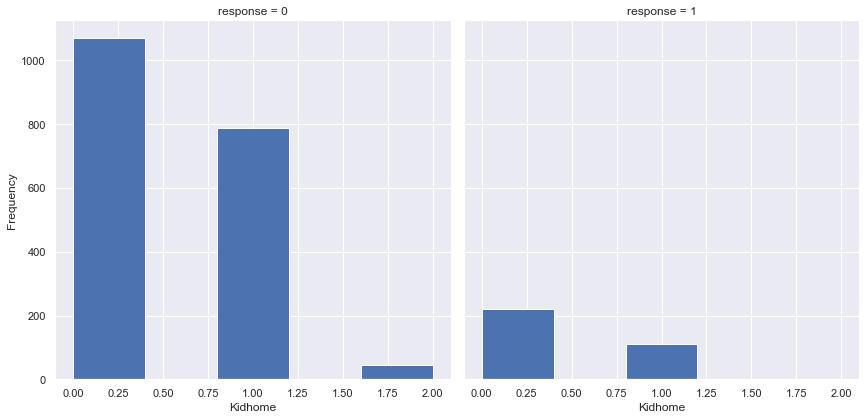

In [9]:
#plot `kidhome` and `response` of the last campaign face by face
g = sns.FacetGrid(df, col='response', size=6)
g.map(plt.hist, 'kidhome', bins=5)
g.set_axis_labels('Kidhome', 'Frequency', fontsize=12);

## (8) Plot  a matrix for some specific variables

> There is a positive relationship between the amount spent on fruits and the amount spent on fish products, so most probably the customer who buys fruits, buys fish products as well. 

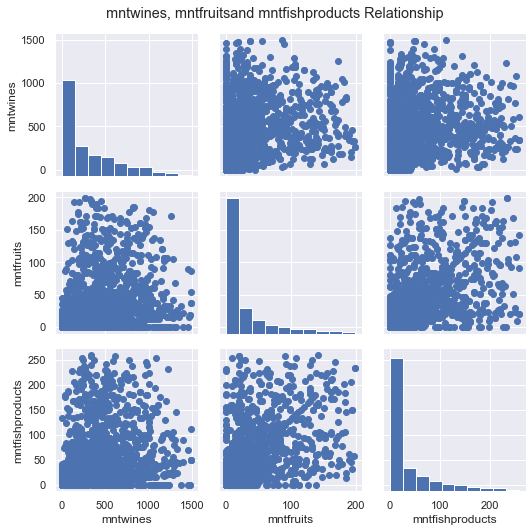

In [12]:
#plot a matrix for some specific variables
g = sns.PairGrid(data = df, vars = ['mntwines', 'mntfruits', 
       'mntfishproducts'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

g.fig.subplots_adjust(top=0.93)
g.fig.suptitle('mntwines, mntfruitsand mntfishproducts Relationship');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:

> `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> `!jupyter nbconvert my_slide_deck.ipynb --to slides --post serve` with code

> `!jupyter nbconvert my_slide_deck.ipynb --to slides --no-input` without code


> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [11]:
import nbconvert
!jupyter nbconvert marketing_analytics_slide_deck.ipynb --to slides --no-input


[NbConvertApp] Converting notebook marketing_analytics_slide_deck.ipynb to slides
[NbConvertApp] Writing 876662 bytes to marketing_analytics_slide_deck.slides.html
